In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Model Selection
- trees/RFs
- BMA
- random effects brms (with lasso prior)

In [111]:
prison_df = pd.read_csv("Data/tidy_df.csv")
prison_2012 = prison_df.query("year==2012"). \
loc[:,prison_df.columns.str.contains("Female")==False]

prison_2012_shrt=prison_2012. \
filter(prison_2012.loc[:,prison_2012.columns.str.contains("16-18")==False]). \
drop(["CST-prop-Others-Male","IPC-prop-Unknown-Total 18-30 years", 
                  "IPC-prop-Unknown-Total 30-50 years", "IPC-prop-Unknown-Total Above 50 years",
                  "JWP-prop-Others", "JWP-prop-Women Jail","REL-prop-Others-Male",
                  "computer_course", "elementary_education",
                  "habitual_offenders","year","killed","area","incidence"],axis=1). \
assign(convict_prop = lambda df: df["convicts_admitted"]/df["pop_2011"]). \
drop(["convicts_admitted","pop_2011"],axis=1)

prison_2012_shrt

,state_name,recidiv_ratio,CST-prop-OBC-Male,CST-prop-SC-Male,CST-prop-ST-Male,SP-prop-life-Male-age_18_30_years,SP-prop-light-Male-age_18_30_years,SP-prop-long-Male-age_18_30_years,SP-prop-med-Male-age_18_30_years,SP-prop-life-Male-age_30_50_years,...,adult_education,higher_education,inmates_trained,financial_assistance_provided,rehabilitated,legal_aid_provided,injured,region,dens,convict_prop
11,Andhra Pradesh,0.136907,0.241423,0.189750,0.094452,0.205845,0.056120,0.024142,0.037061,0.368488,...,19539,514,1993.0,79,31,2402,0,Southern,308.272520,0.000196
15,Arunachal Pradesh,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,...,0,0,7.0,0,0,6,0,Northeastern,16.510168,0.000007
28,Assam,0.058550,0.260252,0.196215,0.148265,0.124606,0.026183,0.116088,0.020189,0.323344,...,1423,51,267.0,196,99,22,0,Northeastern,397.374640,0.000069
41,Bihar,0.008611,0.495618,0.136319,0.045521,0.138997,0.020204,0.076193,0.029455,0.330088,...,2871,12,1878.0,76,1,563,17,North Central,1102.392978,0.000077
43,Chhattisgarh,0.017421,0.333836,0.211100,0.301811,0.257545,0.016767,0.109323,0.026157,0.298793,...,839,239,1040.0,5,0,1261,0,Central,188.919351,0.000139
66,Goa,0.029630,0.117647,0.051471,0.066176,0.169118,0.044118,0.125000,0.066176,0.250000,...,0,6,117.0,7,34,241,0,Western,393.766343,0.000093
79,Gujarat,0.000000,0.301145,0.165731,0.212666,0.086234,0.036829,0.131148,0.035257,0.255333,...,2082,1348,5737.0,86,114,3370,0,Western,308.042015,0.000114
90,Haryana,0.023272,0.223996,0.251604,0.037756,0.184599,0.018206,0.156544,0.034472,0.213849,...,605,655,602.0,0,224,1747,15,Northern,582.490749,0.000170
103,Himachal Pradesh,0.000000,0.081933,0.303571,0.042017,0.087185,0.012605,0.153361,0.042017,0.226891,...,42,22,124.0,0,3,332,0,Northern,123.156809,0.000090
116,Jammu & Kashmir,0.002217,0.056555,0.151671,0.064267,0.133676,0.010283,0.089974,0.074550,0.321337,...,182,61,517.0,0,108,201,1,Northern,297.079283,0.000036


## LASSO

In [122]:
X = prison_2012_shrt.drop(["state_name","recidiv_ratio","region"],axis=1)
X_std = (X-X.mean())/X.std() 


Y= prison_2012_shrt["recidiv_ratio"]
Y_std = (Y-Y.mean())/Y.std()

In [124]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.8)
clf.fit(X_std,Y_std)

Lasso(alpha=0.8)

In [125]:
coefs = clf.coef_
#print(prison_2012_shrt.drop(["state_name","recidiv_ratio","region"],axis=1).loc[:,coefs!=0].columns)
print(coefs)

[ 0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0.
 -0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
 -0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.]


## Random Forest for One Year

In [126]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = \
train_test_split(X_std, Y_std, test_size=0.25,random_state=47)

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

(array([1., 0., 1., 1., 0., 1., 0., 1., 1., 1.]),
 array([0.02304051, 0.16743431, 0.31182812, 0.45622192, 0.60061572,
        0.74500952, 0.88940332, 1.03379712, 1.17819093, 1.32258473,
        1.46697853]),
 <BarContainer object of 10 artists>)

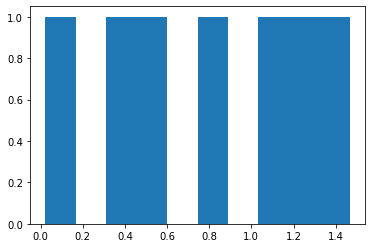

In [128]:
predictions = rf.predict(test_features)

errors = abs(predictions- test_labels)

plt.hist(errors)

In [130]:
importances=list(rf.feature_importances_)
feature_list = list(X.columns)
feature_importances = [(feature, round(importance,2)) for feature,
                       importance in zip(feature_list,importances)]

sorted(feature_importances, key = lambda x: x[1], reverse=True)

[('SP-prop-light-Male-age_18_30_years', 0.15),
 ('CST-prop-ST-Male', 0.07),
 ('IPC-prop-Business-Total 18-30 years', 0.06),
 ('SP-prop-long-Male-age_18_30_years', 0.05),
 ('REL-prop-Christian-Male', 0.05),
 ('SP-prop-light-Male-age_50_above', 0.04),
 ('IPC-prop-Business-Total 30-50 years', 0.04),
 ('IPC-prop-Violent-Total 30-50 years', 0.04),
 ('SP-prop-life-Male-age_30_50_years', 0.03),
 ('EDUC-prop-Graduate-Male', 0.03),
 ('IPC-prop-Theft-Total 18-30 years', 0.03),
 ('dens', 0.03),
 ('SP-prop-med-Male-age_18_30_years', 0.02),
 ('EDUC-prop-Holding technical degree/diploma etc-Male', 0.02),
 ('IPC-prop-Sexual-Total 30-50 years', 0.02),
 ('IPC-prop-Sexual-Total Above 50 years', 0.02),
 ('JWP-prop-Central Jail', 0.02),
 ('JWP-prop-District Jail', 0.02),
 ('CST-prop-OBC-Male', 0.01),
 ('CST-prop-SC-Male', 0.01),
 ('SP-prop-light-Male-age_30_50_years', 0.01),
 ('SP-prop-long-Male-age_30_50_years', 0.01),
 ('SP-prop-med-Male-age_30_50_years', 0.01),
 ('SP-prop-long-Male-age_50_above', 0.01)

## Mixed-Effect Random Forests
With the help of this blog post (https://towardsdatascience.com/mixed-effects-random-forests-6ecbb85cb177), I implement a mixed-effect random forest model used for longitudinal data. The fixed effects are modeled with a random forest, and the random effects are tacked on as a linear term along with homoskedastic error. 

I choose to include a random intercept by state and a random slope on year by state. 

**Everything works until I standardize the variables; I need to check for 0-entries.**

In [28]:
import merf

In [36]:
prison_df. \
filter(prison_df.loc[:,prison_df.columns.str.contains("Female")==False])

,state_name,year,convicts_admitted,habitual_offenders,recidiv_ratio,CST-prop-OBC-Male,CST-prop-Others-Male,CST-prop-SC-Male,CST-prop-ST-Male,SP-prop-life-Male-age_18_30_years,...,financial_assistance_provided,rehabilitated,legal_aid_provided,incidence,injured,killed,pop_2011,area,region,dens
0,Andhra Pradesh,2001,17345,1063,0.061286,0.361526,0.222459,0.292822,0.099029,0.149491,...,14,75,2594,0,0,0,49386799,160205,Southern,308.27252
1,Andhra Pradesh,2002,13322,318,0.023870,0.376232,0.272373,0.241585,0.078818,0.189245,...,37,108,1876,0,0,0,49386799,160205,Southern,308.27252
2,Andhra Pradesh,2003,15682,536,0.034179,0.442782,0.225763,0.224014,0.074024,0.177579,...,0,0,2126,0,0,0,49386799,160205,Southern,308.27252
3,Andhra Pradesh,2004,14397,399,0.027714,0.450367,0.252676,0.192655,0.062959,0.200000,...,0,0,909,0,0,0,49386799,160205,Southern,308.27252
4,Andhra Pradesh,2005,12389,977,0.078860,0.439234,0.261824,0.199960,0.059469,0.171822,...,0,204,2342,0,0,0,49386799,160205,Southern,308.27252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,West Bengal,2009,10890,2100,0.192837,0.067748,0.639635,0.141578,0.082615,0.093428,...,161,5,2920,1,6,0,91347736,88752,Eastern,1029.24707
314,West Bengal,2010,12150,1940,0.159671,0.105054,0.592246,0.141571,0.095189,0.062132,...,170,12,3020,1,2,0,91347736,88752,Eastern,1029.24707
315,West Bengal,2011,10259,1470,0.143289,0.056360,0.601943,0.132686,0.145053,0.097703,...,37,4,4057,3,36,0,91347736,88752,Eastern,1029.24707
316,West Bengal,2012,8650,1207,0.139538,0.074380,0.604764,0.159131,0.096257,0.106628,...,25,23,2583,7,14,0,91347736,88752,Eastern,1029.24707


In [90]:
prison_shrt = prison_df.dropna(). \
filter(prison_df.loc[:,prison_df.columns.str.contains("Female")==False]). \
filter(prison_df.loc[:,prison_df.columns.str.contains("16-18")==False]). \
drop(["CST-prop-Others-Male","IPC-prop-Unknown-Total 18-30 years", 
                  "IPC-prop-Unknown-Total 30-50 years", "IPC-prop-Unknown-Total Above 50 years",
                  "JWP-prop-Others", "JWP-prop-Women Jail","REL-prop-Others-Male",
                  "computer_course", "elementary_education",
                  "habitual_offenders","killed","area","incidence", "region"],axis=1). \
assign(convict_prop = lambda df: df["convicts_admitted"]/df["pop_2011"]). \
drop(["convicts_admitted","pop_2011"],axis=1)

In [151]:
X = prison_shrt.drop(["recidiv_ratio"],axis=1)
X_std = (X-X.mean())/X.std() 
Y = prison_shrt["recidiv_ratio"]
Y_std = (Y-Y.mean())/Y.std()

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = \
train_test_split(X_std, Y_std, test_size=0.25,random_state=47)

train_clusters = train_features["state_name"]
train_Z = np.transpose(np.array
             ([np.repeat(1,train_clusters.shape[0]),
               train_features["year"].to_numpy()]))
train_features = train_features.drop(["state_name", "year"], axis=1)

In [150]:
X_std.loc[]

,CST-prop-OBC-Male,CST-prop-SC-Male,CST-prop-ST-Male,EDUC-prop-Below Class X-Male,EDUC-prop-Class X and above but below graduate-Male,EDUC-prop-Graduate-Male,EDUC-prop-Holding technical degree/diploma etc-Male,EDUC-prop-Illiterate-Male,EDUC-prop-Post-Graduate-Male,IPC-prop-Business-Total 18-30 years,...,convict_prop,dens,financial_assistance_provided,higher_education,injured,inmates_trained,legal_aid_provided,rehabilitated,state_name,year
0,0.894483,1.414435,-0.531228,-0.474263,-0.557735,0.871310,0.378090,0.653514,0.588748,-0.244973,...,0.224119,-0.275382,-0.247545,0.866901,-0.440829,-0.068849,1.772680,0.310829,NaN,-1.678116
1,0.992988,0.812081,-0.625604,-0.642083,-0.474432,-0.010447,0.394261,1.112245,-0.328363,-0.362547,...,0.054273,-0.275382,-0.102522,1.293373,-0.440829,-0.166514,1.086789,0.604164,NaN,-1.407256
2,1.438769,0.605518,-0.647990,-0.190092,-0.348843,0.044792,-0.113706,0.484654,-0.191171,-0.354546,...,0.153909,-0.275382,-0.335819,1.172165,-0.440829,-0.583539,1.325609,-0.355843,NaN,-1.136396
3,1.489577,0.236852,-0.699656,-0.279867,-0.442871,-0.142400,-0.022333,0.634744,-0.170411,-0.356004,...,0.099658,-0.275382,-0.335819,0.884858,-0.440829,-0.205134,0.163034,-0.355843,NaN,-0.865536
4,1.415000,0.322735,-0.715953,-0.168802,-0.387072,-0.083990,0.002865,0.455799,-0.135959,-0.443344,...,0.014883,-0.275382,-0.335819,1.261949,-0.440829,0.086003,1.531949,1.457504,NaN,-0.594676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,-1.073350,-0.363618,-0.607871,0.228443,-0.892788,-0.315501,-0.423144,0.230913,-0.443993,-0.499502,...,-0.259595,2.214830,0.679338,-0.439450,-0.031081,-0.303542,2.084101,-0.311398,NaN,0.488763
314,-0.823463,-0.363695,-0.549159,-0.783296,-0.696806,-0.363570,-0.299084,1.317248,-0.364537,-0.485221,...,-0.230835,2.214830,0.736086,-0.403537,-0.304246,-0.159459,2.179628,-0.249176,NaN,0.759623
315,-1.149628,-0.468160,-0.316315,-0.012942,-0.319154,-0.275750,-0.416417,0.160579,-0.498650,-0.250991,...,-0.273998,2.214830,-0.102522,-0.147654,2.017656,-0.309483,3.170253,-0.320287,NaN,1.030483
316,-1.028925,-0.157256,-0.544172,-0.045821,-0.669052,-0.346636,-0.344547,0.407737,-0.230420,0.482535,...,-0.310724,2.214830,-0.178186,0.148632,0.515249,0.008391,1.762172,-0.151397,NaN,1.301343


In [152]:
from merf.merf import MERF
mrf = MERF(max_iterations=200)
mrf.fit(train_features,train_Z,train_clusters,train_labels)

ZeroDivisionError: float division by zero

In [99]:
mrf.trained_b

,0,1
Madhya Pradesh,-0.329594,0.000159
Punjab,-0.102636,0.000047
Meghalaya,0.836116,-0.000406
Uttar Pradesh,-0.181785,0.000088
Karnataka,-1.156299,0.000558
Rajasthan,-0.115281,0.000056
Assam,-0.547385,0.000264
Jharkhand,0.523409,-0.000250
Himachal Pradesh,-0.816084,0.000393
Chhattisgarh,-0.545285,0.000264


(array([6., 5., 6., 5., 1., 1., 1., 0., 0., 1.]),
 array([-3.18040857, -1.97298438, -0.76556018,  0.44186401,  1.6492882 ,
         2.85671239,  4.06413659,  5.27156078,  6.47898497,  7.68640917,
         8.89383336]),
 <BarContainer object of 10 artists>)

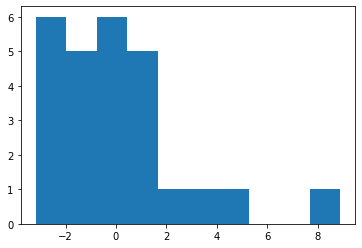

In [137]:
from merf.viz import plot_merf_training_stats

mrf.gll_history
plt.hist(mrf.trained_b[0])


In [146]:
list(train_features.columns)

Index(['CST-prop-OBC-Male', 'CST-prop-SC-Male', 'CST-prop-ST-Male',
       'SP-prop-life-Male-age_18_30_years',
       'SP-prop-light-Male-age_18_30_years',
       'SP-prop-long-Male-age_18_30_years', 'SP-prop-med-Male-age_18_30_years',
       'SP-prop-life-Male-age_30_50_years',
       'SP-prop-light-Male-age_30_50_years',
       'SP-prop-long-Male-age_30_50_years', 'SP-prop-med-Male-age_30_50_years',
       'SP-prop-life-Male-age_50_above', 'SP-prop-light-Male-age_50_above',
       'SP-prop-long-Male-age_50_above', 'SP-prop-med-Male-age_50_above',
       'EDUC-prop-Below Class X-Male',
       'EDUC-prop-Class X and above but below graduate-Male',
       'EDUC-prop-Graduate-Male',
       'EDUC-prop-Holding technical degree/diploma etc-Male',
       'EDUC-prop-Illiterate-Male', 'EDUC-prop-Post-Graduate-Male',
       'REL-prop-Christian-Male', 'REL-prop-Hindu-Male',
       'REL-prop-Muslim-Male', 'REL-prop-Sikh-Male',
       'IPC-prop-Business-Total 18-30 years',
       'IPC-prop-Sexual

In [147]:


importances=list(mrf.trained_fe_model.feature_importances_)
feature_list = list(train_features.columns)
feature_importances = [(feature, round(importance,2)) for feature,
                       importance in zip(feature_list,importances)]

sorted(feature_importances, key = lambda x: x[1], reverse=True)

[('SP-prop-life-Male-age_50_above', 0.21),
 ('REL-prop-Muslim-Male', 0.12),
 ('SP-prop-med-Male-age_50_above', 0.06),
 ('convict_prop', 0.06),
 ('SP-prop-light-Male-age_18_30_years', 0.04),
 ('REL-prop-Sikh-Male', 0.04),
 ('CST-prop-ST-Male', 0.03),
 ('IPC-prop-Theft-Total 18-30 years', 0.03),
 ('CST-prop-OBC-Male', 0.02),
 ('SP-prop-long-Male-age_18_30_years', 0.02),
 ('SP-prop-med-Male-age_18_30_years', 0.02),
 ('SP-prop-life-Male-age_30_50_years', 0.02),
 ('SP-prop-light-Male-age_30_50_years', 0.02),
 ('EDUC-prop-Below Class X-Male', 0.02),
 ('EDUC-prop-Class X and above but below graduate-Male', 0.02),
 ('REL-prop-Christian-Male', 0.02),
 ('REL-prop-Hindu-Male', 0.02),
 ('IPC-prop-Violent-Total 18-30 years', 0.02),
 ('SP-prop-life-Male-age_18_30_years', 0.01),
 ('SP-prop-long-Male-age_30_50_years', 0.01),
 ('SP-prop-med-Male-age_30_50_years', 0.01),
 ('SP-prop-light-Male-age_50_above', 0.01),
 ('EDUC-prop-Graduate-Male', 0.01),
 ('EDUC-prop-Illiterate-Male', 0.01),
 ('IPC-prop-Sexu

(array([1., 0., 0., 1., 1., 1., 5., 6., 5., 6.]),
 array([-0.00434964, -0.00375913, -0.00316862, -0.00257811, -0.0019876 ,
        -0.00139709, -0.00080658, -0.00021607,  0.00037444,  0.00096495,
         0.00155546]),
 <BarContainer object of 10 artists>)

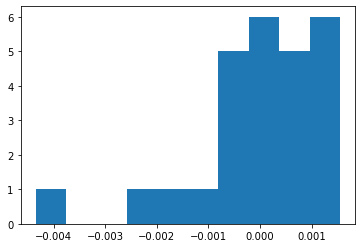

In [136]:
plt.hist(mrf.trained_b[1])